In [31]:
using DifferentialEquations

f = (t,u,du) -> begin
  x = view(u,1:7)   # x
  y = view(u,8:14)  # y
  v = view(u,15:21) # x′
  w = view(u,22:28) # y′
  du[1:7] .= v
  du[8:14].= w
  for i in 14:28
    du[i] = zero(u[1])
  end
  for i=1:7,j=1:7
    if i != j
      r = ((x[i]-x[j])^2 + (y[i] - y[j])^2)^(3/2)
      du[14+i] += j*(x[j] - x[i])/r
      du[21+i] += j*(y[j] - y[i])/r
    end
  end
end

prob = ODEProblem(f,[3.0,3.0,-1.0,-3.0,2.0,-2.0,2.0,3.0,-3.0,2.0,0,0,-4.0,4.0,0,0,0,0,0,1.75,-1.5,0,0,0,-1.25,1,0,0])


tspan = [0,3]
abstols = 1./10.^(6:9)
reltols = 1./10.^(3:6);

In [50]:
sol = solve(prob,tspan,alg=:Vern8,abstol=1/10^12,reltol=1/10^10,maxiters=1000000)
test_sol = TestSolution(sol)

DifferentialEquations.TestSolution(nothing,DifferentialEquations.ODESolution, 200 timesteps, final value [-1.12909,3.41533,-1.44069,0.694722,-0.90605,1.785,-0.619737,4.46173,-3.41398,5.83732,-3.04456,3.88914,-0.523747,4.0,-3.63803,1.60799,-2.73719,2.51841,0.520823,-0.183132,-0.420761,-2.0246,0.181768,0.691844,-0.250002,6.45493,1.80275,-6.07222],true)

## Low Order

ODE.jl had to be discarded. The error estimate is off since it aborts and so that artificially lowers the error the the time is serverly diminished.


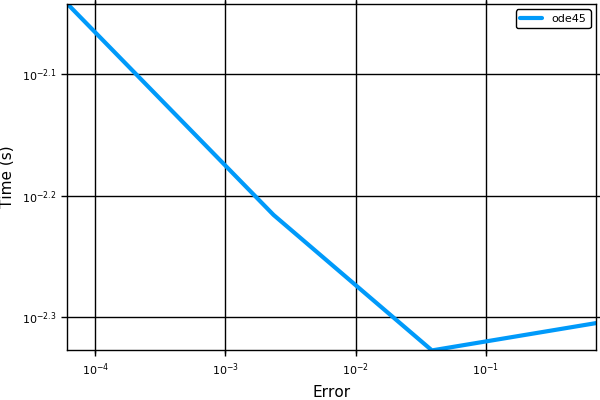

In [52]:
setups = [Dict(:alg=>:ode45)]
wp = ode_workprecision_set(prob,tspan,abstols,reltols,setups;appxsol=test_sol,dense=false,save_timeseries=false,numruns=100,maxiters=10000)
plot(wp)


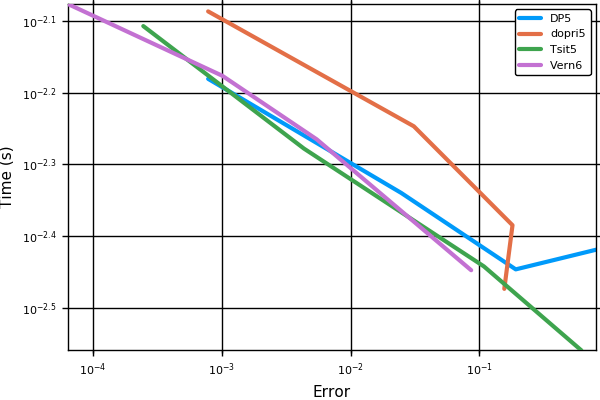

In [53]:
setups = [Dict(:alg=>:DP5)
          Dict(:alg=>:dopri5)
          Dict(:alg=>:Tsit5)
          Dict(:alg=>:Vern6)
]
wp = ode_workprecision_set(prob,tspan,abstols,reltols,setups;appxsol=test_sol,dense=false,save_timeseries=false,numruns=100,maxiters=10000)
plot(wp)

### Interpolation


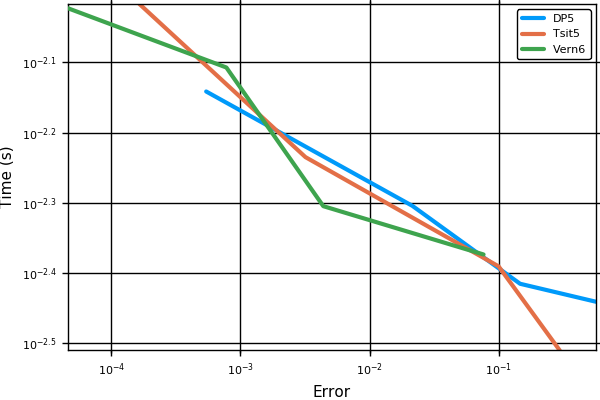

In [55]:
setups = [Dict(:alg=>:DP5)
          Dict(:alg=>:Tsit5)
          Dict(:alg=>:Vern6)
]
wp = ode_workprecision_set(prob,tspan,abstols,reltols,setups;appxsol=test_sol,dense=true,save_timeseries=true,numruns=100,maxiters=10000,error_estimate=:L2)
plot(wp)

## Higher Order

Once again ODE.jl had to be discarded.


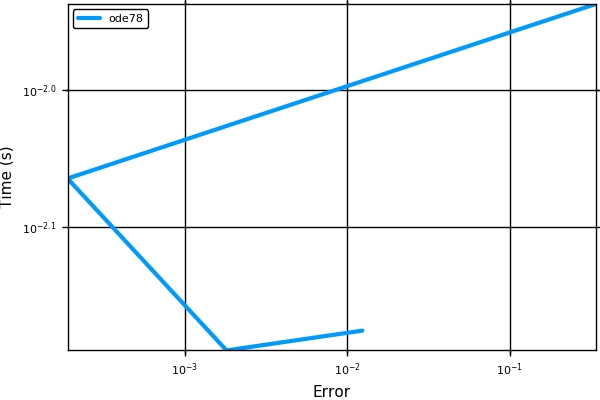

In [59]:
setups = [Dict(:alg=>:ode78)]
wp = ode_workprecision_set(prob,tspan,abstols,reltols,setups;appxsol=test_sol,dense=false,save_timeseries=false,numruns=100,maxiters=1000)
plot(wp)


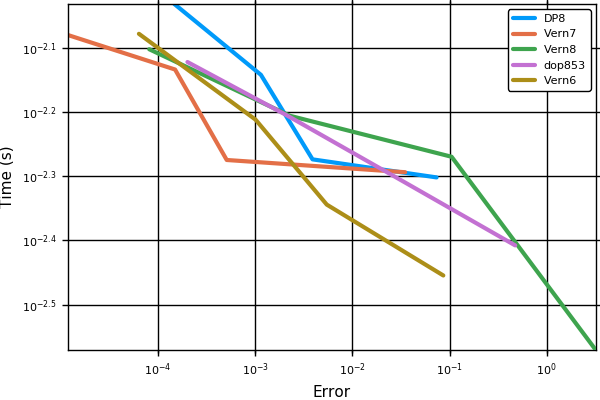

In [60]:
setups = [Dict(:alg=>:DP8)
          Dict(:alg=>:Vern7)
          Dict(:alg=>:Vern8)
          Dict(:alg=>:dop853)
          Dict(:alg=>:Vern6)
]
wp = ode_workprecision_set(prob,tspan,abstols,reltols,setups;appxsol=test_sol,dense=false,save_timeseries=false,numruns=100,maxiters=1000)
plot(wp)

### Interpolations


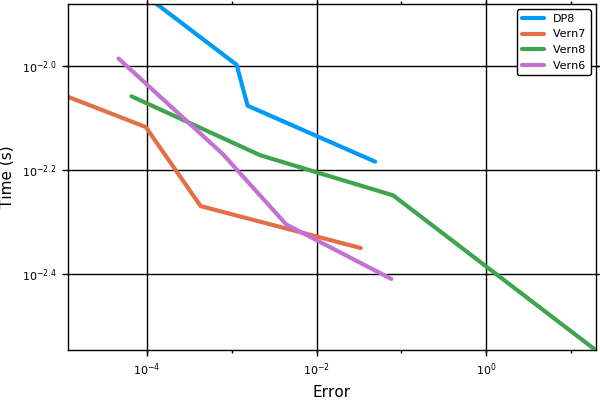

In [61]:
setups = [Dict(:alg=>:DP8)
          Dict(:alg=>:Vern7)
          Dict(:alg=>:Vern8)
          Dict(:alg=>:Vern6)
]
wp = ode_workprecision_set(prob,tspan,abstols,reltols,setups;appxsol=test_sol,dense=true,save_timeseries=true,numruns=100,maxiters=1000,error_estimate=:L2)
plot(wp)

## Conclusion

One big conclusion is that, once again, the ODE.jl algorithms fail to run on difficult problems. Its minimum timestep is essentially machine epsilon, and so this shows some fatal flaws in its timestepping algorithm. The DifferentialEquations algorithms come out as faster in each case than the ODEInterface algorithms. Overall, the Verner methods have a really good showing once again.